<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Machine Learning</h1><h2>Assignment 1</h2><h3>
    </tr>
</table>

#### Cesar Chen Peralta Jr II / S10205582

### 1. [HR Analytics](#part1)
   - [1.1 Load and Explore the data](#part1.1)
   - [1.2 Cleanse and Transform the data](#part1.2)
   - [1.3 Correlation Analysis](#part1.3)
   - [1.4 Export the data](#part1.4)
   
### 2. [Airbnb](#part2)
   - [2.1 Load and Explore the data](#part2.1)
   - [2.2 Cleanse and Transform the data](#part2.2)
   - [2.3 Correlation Analysis](#part2.3)
   - [2.4 Export the data](#part2.4)

In [2]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. HR Analytics <a id="part1"></a>

### 1.1 Load and Explore the data <a id="part1.1"></a> 

In [3]:
# Load dataset into a DataFrame
df_hr = pd.read_csv('hr_data.csv')

# Create a copy of the DataFrame
df1 = df_hr.copy()

# Show overview of the dataset
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
# Show info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
# Select numerical values
df1_num = df1.select_dtypes(['int64','float64']).copy()
df1_num.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


In [5]:
# Analyse numerical values
df1_num.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


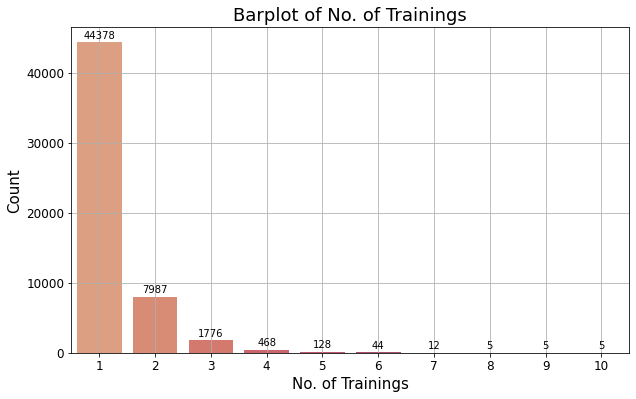

In [6]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create barplot
ax = sns.barplot(x=df1['no_of_trainings'].value_counts().index, y=df1['no_of_trainings'].value_counts(), 
                 data=df1, palette='flare')

# Decorate using Matplotlib
plt.xlabel('No. of Trainings', fontsize=15)
plt.ylabel('Count', fontsize=15) 
plt.title('Barplot of No. of Trainings', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

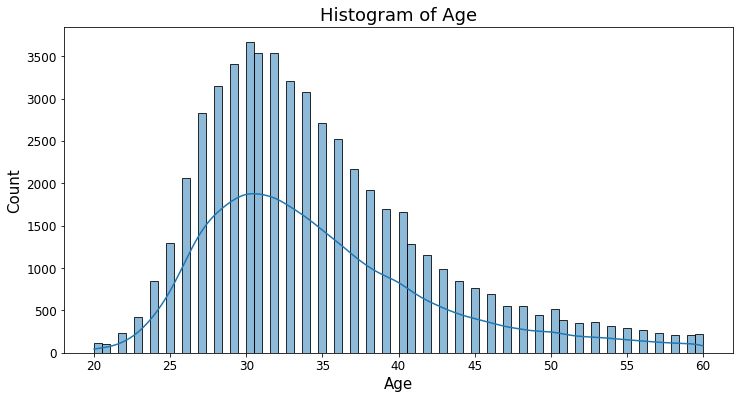

In [7]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Create histogram
sns.histplot(x='age', kde = True,data=df1)

# Decorate using Matplotlib
plt.title('Histogram of Age', fontsize=18)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

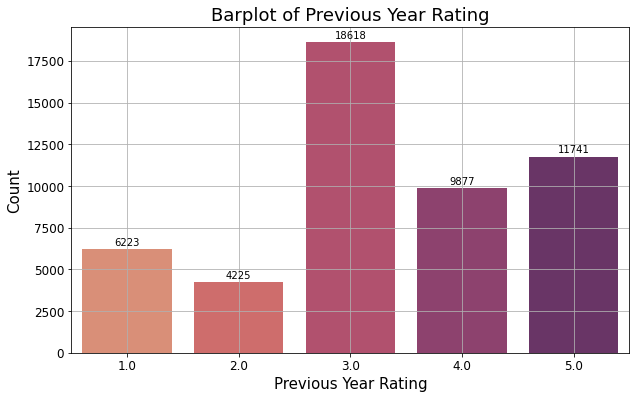

In [8]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create barplot
ax = sns.barplot(x=df1['previous_year_rating'].value_counts().index, y=df1['previous_year_rating'].value_counts()
                 , data=df1, palette='flare')

# Decorate using Matplotlib
plt.xlabel('Previous Year Rating', fontsize=15)
plt.ylabel('Count', fontsize=15) 
plt.title('Barplot of Previous Year Rating', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

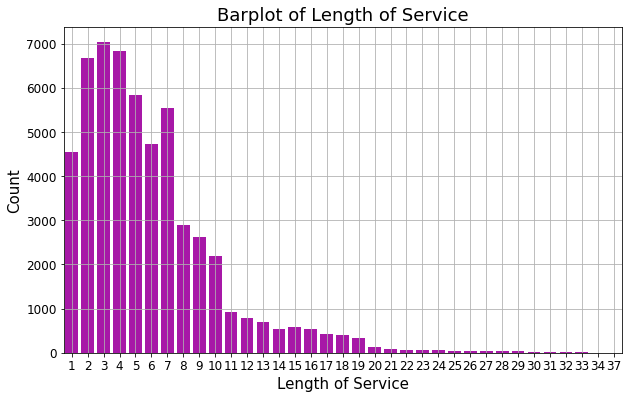

In [9]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create barplot
ax = sns.barplot(x=df1['length_of_service'].value_counts().index, y=df1['length_of_service'].value_counts(), 
                 data=df1, color='m')

# Decorate using Matplotlib
plt.xlabel('Length of Service', fontsize=15)
plt.ylabel('Count', fontsize=15) 
plt.title('Barplot of Length of Service', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display plot
plt.show()

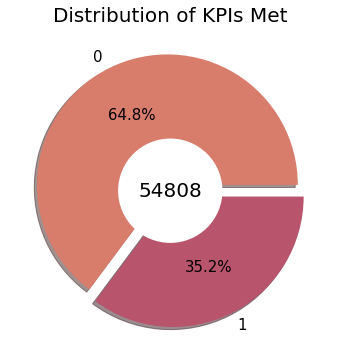

In [10]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Count distribution of KPIs met
frequency = df1['KPIs_met >80%'].value_counts()
labels = frequency.index
colors = ['#d87c6c', '#b8546c']

# Create pie chart
plt.pie(frequency, labels = labels, autopct = '%1.1f%%', 
        shadow = True, explode = (0.05,0.05), colors=colors, textprops = {'fontsize':15})

# Draw centre circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Decorate using Matplotlib
plt.text(0,0,df1['KPIs_met >80%'].count(), ha='center',va='center', fontsize=20)
plt.title('Distribution of KPIs Met', fontsize=20)

# Display chart
plt.show()

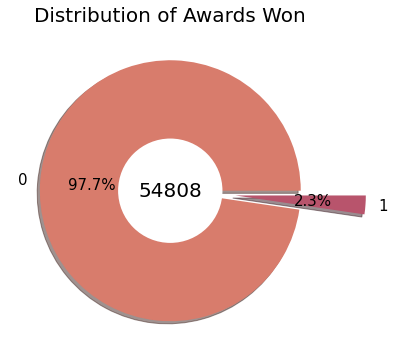

In [11]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Count distribution of awards won
frequency = df1['awards_won?'].value_counts()
labels = frequency.index
colors = ['#d87c6c', '#b8546c']

# Create pie chart
plt.pie(frequency, labels = labels, autopct = '%1.1f%%', 
        shadow = True, explode = (0,0.5), colors=colors, textprops = {'fontsize':15})

# Draw centre circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Decorate using Matplotlib
plt.text(0,0,df1['awards_won?'].count(), ha='center',va='center', fontsize=20)
plt.title('Distribution of Awards Won', fontsize=20)

# Display chart
plt.show()

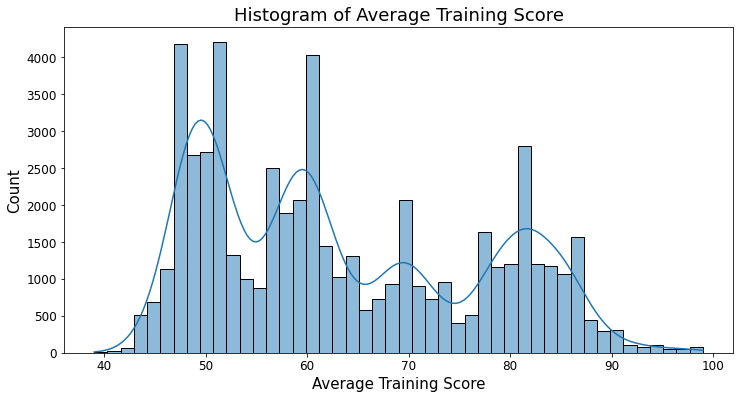

In [12]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Create histogram
sns.histplot(x='avg_training_score', kde = True,data=df1)

# Decorate using Matplotlib
plt.title('Histogram of Average Training Score', fontsize=18)
plt.xlabel('Average Training Score', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

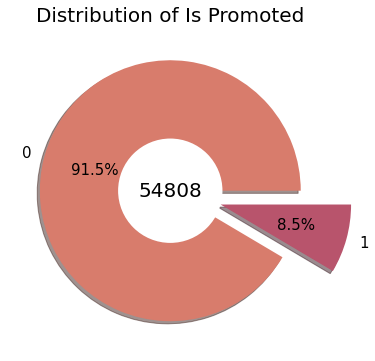

In [13]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Count frequency of is promoted
frequency = df1.is_promoted.value_counts()
labels = frequency.index
colors = ['#d87c6c', '#b8546c']

# Create pie chart
plt.pie(frequency, labels = labels, autopct = '%1.1f%%', 
        shadow = True, explode = (0,0.4), colors=colors, textprops = {'fontsize':15})

# Draw centre circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Decorate using Matplotlib
plt.text(0,0,df1.is_promoted.count(), ha='center',va='center', fontsize=20)
plt.title('Distribution of Is Promoted', fontsize=20)

# Display chart
plt.show()

In [14]:
# Select categorical values
df1_cat = df1.select_dtypes(['object']).copy()
df1_cat.head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [15]:
# Analyse categorical values
df1_cat.describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


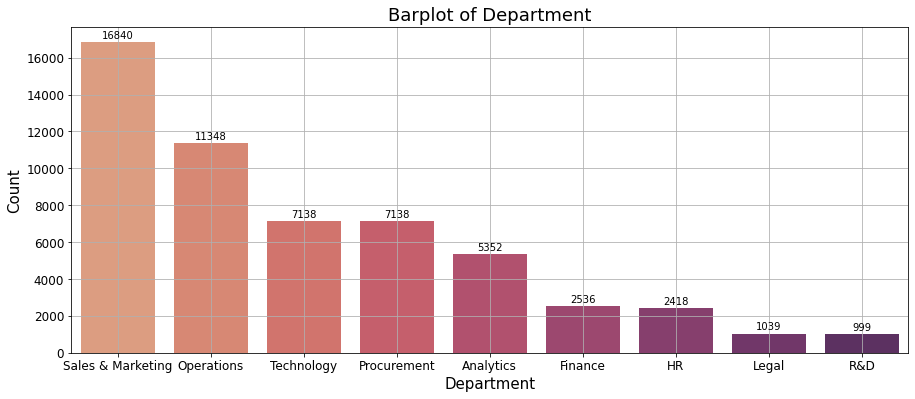

In [16]:
# Set figure size with matplotlib
plt.figure(figsize=(15,6))

# Create barplot
ax = sns.barplot(x=df1['department'].value_counts().index, y=df1['department'].value_counts(), data=df1, palette='flare')

# Decorate using Matplotlib
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15) 
plt.title('Barplot of Department', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

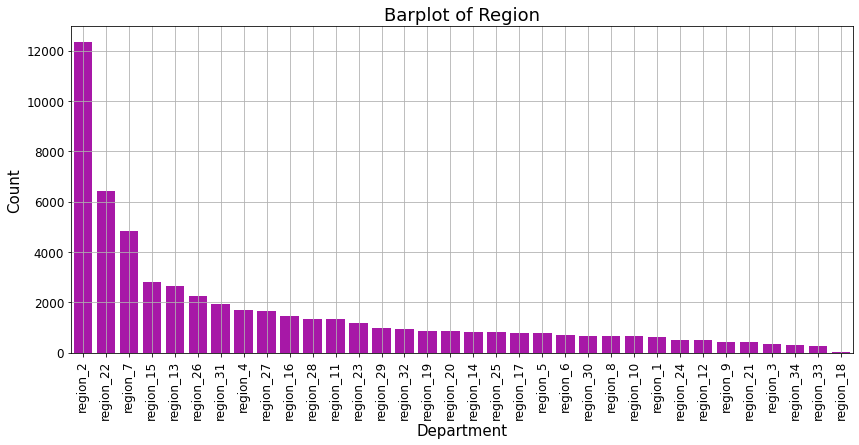

In [17]:
# Set figure size with matplotlib
plt.figure(figsize=(14,6))

# Create barplot
ax = sns.barplot(x=df1['region'].value_counts().index, y=df1['region'].value_counts(), data=df1, color='m')

# Decorate using Matplotlib
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15) 
plt.title('Barplot of Region', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display plot
plt.show()

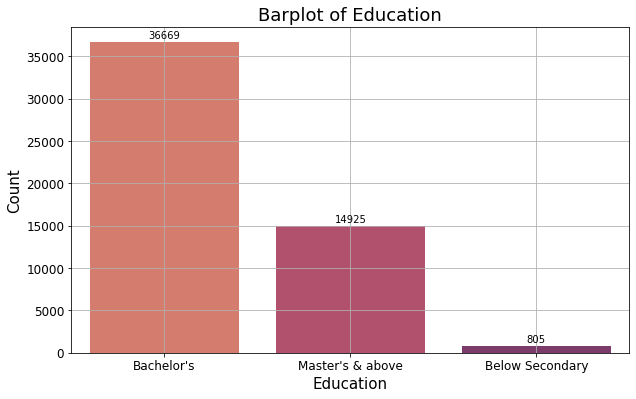

In [18]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create barplot
ax = sns.barplot(x=df1['education'].value_counts().index, y=df1['education'].value_counts(), data=df1, palette='flare')

# Decorate using Matplotlib
plt.xlabel('Education', fontsize=15)
plt.ylabel('Count', fontsize=15) 
plt.title('Barplot of Education', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

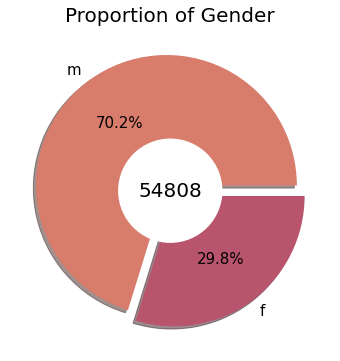

In [19]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Count frequency of genders
frequency = df1.gender.value_counts()
labels = frequency.index
colors = ['#d87c6c', '#b8546c']

# Create pie chart
plt.pie(frequency, labels = labels, autopct = '%1.1f%%', 
        shadow = True, explode = (0.05,0.05), colors=colors, textprops = {'fontsize':15})

# Draw centre circle
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Decorate using Matplotlib
plt.text(0,0,df1.gender.count(), ha='center',va='center', fontsize=20)
plt.title('Proportion of Gender', fontsize=20)

# Display chart
plt.show()

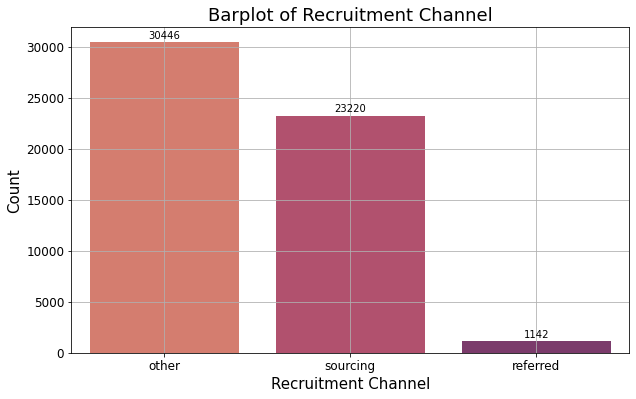

In [20]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create barplot
ax = sns.barplot(x=df1['recruitment_channel'].value_counts().index, y=df1['recruitment_channel'].value_counts(), 
                 data=df1, palette='flare')

# Decorate using Matplotlib
plt.xlabel('Recruitment Channel', fontsize=15)
plt.ylabel('Count', fontsize=15) 
plt.title('Barplot of Recruitment Channel', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

### 1.2 Cleanse and Transform the data <a id="part1.2"></a> 

In [4]:
# Identify columns with missing values
df1.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
# Identify most frequent value in education
df1['education'].mode()

0    Bachelor's
dtype: object

In [6]:
# Clean missing values in education
df1['education'] = df1['education'].fillna("Bachelor's")
df1.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
# Analyse rows with missing previous year rating values 
df1[df1.loc[:,'previous_year_rating'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,Bachelor's,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [8]:
# Clean missing values in previous year rating
df1.loc[df1['previous_year_rating'].isna(), 'previous_year_rating'] = 3
df1['previous_year_rating'] = df1['previous_year_rating'].astype(int)
df1.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [9]:
# Identify values in department
df1['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [10]:
# Map values in Department
df1['department'] = df1['department'].map( {
    'R&D': 1,                                            
    'Legal': 2,                          
    'HR': 3,                                          
    'Finance': 4,                                        
    'Analytics': 5,                                       
    'Procurement': 6,                                      
    'Technology': 7,                                   
    'Operations': 8,                    
    'Sales & Marketing': 9} ).astype(int)
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,9,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,65141,8,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,7513,9,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,2542,9,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,48945,7,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0


In [11]:
# Identify values in region
df1['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [12]:
# Map values in Region
df1['region'] = df1['region'].str.split('_').str[1].astype(int)
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,9,7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,65141,8,22,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,7513,9,19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,2542,9,23,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,48945,7,26,Bachelor's,m,other,1,45,3,2,0,0,73,0


In [13]:
# Identify values in education
df1['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [14]:
# Map values in Education
df1['education'] = df1['education'].map( {
    "Below Secondary": 1,
    "Master's & above": 2,                   
    "Bachelor's": 3} ).astype(int)
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,9,7,2,f,sourcing,1,35,5,8,1,0,49,0
1,65141,8,22,3,m,other,1,30,5,4,0,0,60,0
2,7513,9,19,3,m,sourcing,1,34,3,7,0,0,50,0
3,2542,9,23,3,m,other,2,39,1,10,0,0,50,0
4,48945,7,26,3,m,other,1,45,3,2,0,0,73,0


In [15]:
# Identify values in gender
df1['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [16]:
# Map values in Gender
df1['gender'] = df1['gender'].map( {
    'f': 0,
    'm': 1} ).astype(int)
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,9,7,2,0,sourcing,1,35,5,8,1,0,49,0
1,65141,8,22,3,1,other,1,30,5,4,0,0,60,0
2,7513,9,19,3,1,sourcing,1,34,3,7,0,0,50,0
3,2542,9,23,3,1,other,2,39,1,10,0,0,50,0
4,48945,7,26,3,1,other,1,45,3,2,0,0,73,0


In [17]:
# Identify values in recruitment channel
df1['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [18]:
# Map values in Recruitment Channel
df1['recruitment_channel'] = df1['recruitment_channel'].map( {
    'referred': 1,
    'sourcing': 2,
    'other': 3} ).astype(int)
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,9,7,2,0,2,1,35,5,8,1,0,49,0
1,65141,8,22,3,1,3,1,30,5,4,0,0,60,0
2,7513,9,19,3,1,2,1,34,3,7,0,0,50,0
3,2542,9,23,3,1,3,2,39,1,10,0,0,50,0
4,48945,7,26,3,1,3,1,45,3,2,0,0,73,0


In [19]:
# Drop irrelevant columns
df1 = df1.drop(['employee_id'], axis = 1)

In [20]:
# Identify values in is_promoted
df1['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [21]:
# Fill data frame with is_promoted values of 0
df1_0 = df1[df1['is_promoted']==0]
df1_0.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,9,7,2,0,2,1,35,5,8,1,0,49,0
1,8,22,3,1,3,1,30,5,4,0,0,60,0
2,9,19,3,1,2,1,34,3,7,0,0,50,0
3,9,23,3,1,3,2,39,1,10,0,0,50,0
4,7,26,3,1,3,1,45,3,2,0,0,73,0


In [22]:
# Fill data frame with is_promoted values of 1
df1_1 = df1[df1['is_promoted']==1]
df1_1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
11,9,7,3,0,2,1,35,5,3,1,0,50,1
39,9,28,3,1,2,1,33,5,6,1,0,51,1
60,9,4,2,1,3,1,50,4,17,1,0,47,1
66,4,22,3,1,3,1,27,3,1,1,1,58,1
67,9,22,3,1,2,1,27,3,1,0,0,61,1


In [23]:
# Fill temporary data frame
df1_0_sampled = df1_0.sample(n=len(df1_1), random_state=2).copy()
df1_0_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 6725 to 12976
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   department            4668 non-null   int32
 1   region                4668 non-null   int32
 2   education             4668 non-null   int32
 3   gender                4668 non-null   int32
 4   recruitment_channel   4668 non-null   int32
 5   no_of_trainings       4668 non-null   int64
 6   age                   4668 non-null   int64
 7   previous_year_rating  4668 non-null   int32
 8   length_of_service     4668 non-null   int64
 9   KPIs_met >80%         4668 non-null   int64
 10  awards_won?           4668 non-null   int64
 11  avg_training_score    4668 non-null   int64
 12  is_promoted           4668 non-null   int64
dtypes: int32(6), int64(7)
memory usage: 401.2 KB


In [24]:
# Select new rows
df1 = pd.concat([df1_1,df1_0_sampled],axis = 0)
df1['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

In [25]:
# Analyse info on data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 12976
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   department            9336 non-null   int32
 1   region                9336 non-null   int32
 2   education             9336 non-null   int32
 3   gender                9336 non-null   int32
 4   recruitment_channel   9336 non-null   int32
 5   no_of_trainings       9336 non-null   int64
 6   age                   9336 non-null   int64
 7   previous_year_rating  9336 non-null   int32
 8   length_of_service     9336 non-null   int64
 9   KPIs_met >80%         9336 non-null   int64
 10  awards_won?           9336 non-null   int64
 11  avg_training_score    9336 non-null   int64
 12  is_promoted           9336 non-null   int64
dtypes: int32(6), int64(7)
memory usage: 802.3 KB


In [26]:
# Analyse data frame
df1.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,6.958869,14.053985,2.678770,0.695587,2.526671,1.228685,34.596937,3.579799,5.759533,0.508569,0.066945,67.104863,0.500000
std,1.975376,9.901436,0.497625,0.460183,0.547611,0.567723,7.449845,1.176841,4.146011,0.499953,0.249940,14.569584,0.500027
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,41.000000,0.000000
25%,6.000000,4.000000,2.000000,0.000000,2.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,54.000000,0.000000
50%,7.000000,13.000000,3.000000,1.000000,3.000000,1.000000,33.000000,3.000000,5.000000,1.000000,0.000000,65.000000,0.500000
75%,9.000000,22.000000,3.000000,1.000000,3.000000,1.000000,38.000000,5.000000,7.000000,1.000000,0.000000,81.000000,1.000000
max,9.000000,34.000000,3.000000,1.000000,3.000000,7.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000,1.000000


In [27]:
# Identify skewness in columns
df1[['age', 'previous_year_rating', 'length_of_service', 'avg_training_score']].skew()

age                     1.047687
previous_year_rating   -0.399599
length_of_service       1.705036
avg_training_score      0.247980
dtype: float64

In [28]:
# Log Transformation for Age
df1['age'] = np.log(df1['age'])
df1['age'].skew()

0.5108143177492057

In [29]:
# Min-Max normalization for Average Training Score
df1['avg_training_score'] = (df1['avg_training_score'] - df1['avg_training_score'].min()) / (df1['avg_training_score'].max() - df1['avg_training_score'].min())
df1['avg_training_score'].describe()

count    9336.000000
mean        0.450084
std         0.251200
min         0.000000
25%         0.224138
50%         0.413793
75%         0.689655
max         1.000000
Name: avg_training_score, dtype: float64

In [30]:
# Log Transformation for Length of Service
df1['length_of_service'] = np.log(df1['length_of_service'])
df1['length_of_service'].skew()

-0.2919055063560407

In [31]:
# Analyse data frame
df1.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,6.958869,14.053985,2.678770,0.695587,2.526671,1.228685,3.522452,3.579799,1.502714,0.508569,0.066945,0.450084,0.500000
std,1.975376,9.901436,0.497625,0.460183,0.547611,0.567723,0.203017,1.176841,0.733728,0.499953,0.249940,0.251200,0.500027
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.995732,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,4.000000,2.000000,0.000000,2.000000,1.000000,3.367296,3.000000,1.098612,0.000000,0.000000,0.224138,0.000000
50%,7.000000,13.000000,3.000000,1.000000,3.000000,1.000000,3.496508,3.000000,1.609438,1.000000,0.000000,0.413793,0.500000
75%,9.000000,22.000000,3.000000,1.000000,3.000000,1.000000,3.637586,5.000000,1.945910,1.000000,0.000000,0.689655,1.000000
max,9.000000,34.000000,3.000000,1.000000,3.000000,7.000000,4.094345,5.000000,3.526361,1.000000,1.000000,1.000000,1.000000


### 1.3 Correlation Analysis <a id="part1.3"></a> 

In [32]:
# Analyse correlation between variables
df1.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.000000,-0.041445,0.036360,0.012032,0.006956,-0.029343,0.110603,-0.058954,0.099942,-0.033919,0.000587,-0.400620,0.009544
region,-0.041445,1.000000,0.133446,0.091089,0.035751,0.022692,-0.236861,-0.038025,-0.132303,-0.013186,-0.006006,0.040759,-0.022502
education,0.036360,0.133446,1.000000,0.033244,-0.009243,0.028752,-0.280421,-0.035886,-0.177348,-0.027902,-0.008812,-0.039118,-0.045420
gender,0.012032,0.091089,0.033244,1.000000,-0.020915,0.077464,-0.033628,-0.022987,-0.031574,-0.026376,0.006760,-0.021409,-0.021415
recruitment_channel,0.006956,0.035751,-0.009243,-0.020915,1.000000,0.016387,0.043056,-0.019593,0.024073,-0.019029,0.001433,-0.018094,-0.015844
no_of_trainings,-0.029343,0.022692,0.028752,0.077464,0.016387,1.000000,-0.074558,-0.058502,-0.045341,-0.034267,-0.020329,0.042947,-0.044717
age,0.110603,-0.236861,-0.280421,-0.033628,0.043056,-0.074558,1.000000,0.056092,0.637730,-0.020772,0.001281,-0.056747,-0.022732
previous_year_rating,-0.058954,-0.038025,-0.035886,-0.022987,-0.019593,-0.058502,0.056092,1.000000,0.082760,0.276950,0.057770,0.129430,0.284443
length_of_service,0.099942,-0.132303,-0.177348,-0.031574,0.024073,-0.045341,0.637730,0.082760,1.000000,-0.030597,-0.039798,-0.033712,0.001634
KPIs_met >80%,-0.033919,-0.013186,-0.027902,-0.026376,-0.019029,-0.034267,-0.020772,0.276950,-0.030597,1.000000,0.038701,0.032562,0.380519


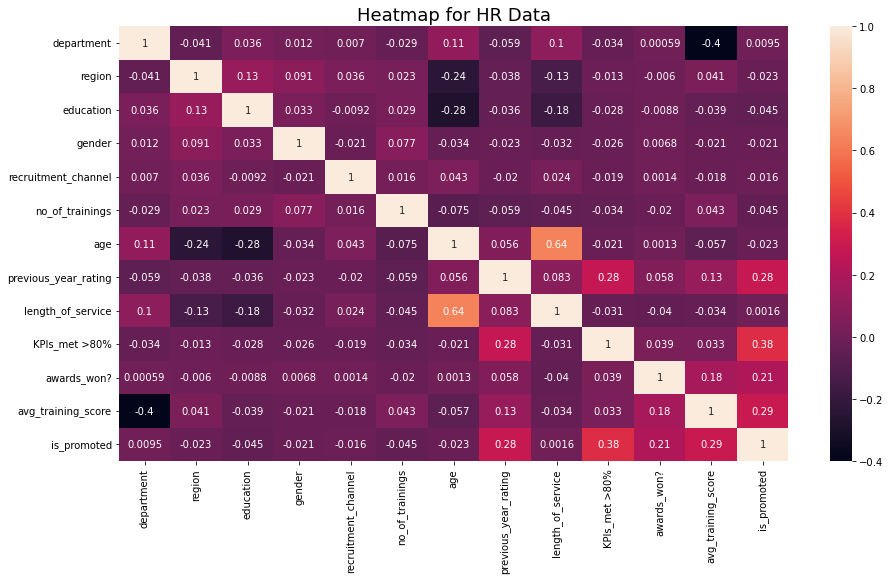

In [33]:
# Create heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True)

plt.title('Heatmap for HR Data', fontsize=18)

plt.show()

<Figure size 1080x720 with 0 Axes>

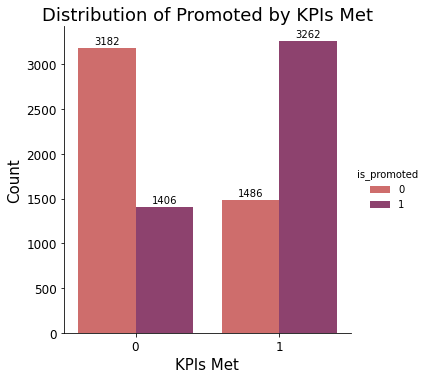

In [51]:
# Set figure size with matplotlib
plt.figure(figsize=(15,10))

# Create catplot
g = sns.catplot(data=df1,x='KPIs_met >80%',kind='count', hue='is_promoted', palette = 'flare')

# Decorate using Matplotlib
plt.title('Distribution of Promoted by KPIs Met', fontsize=18)
plt.xlabel('KPIs Met', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, None)

ax = g.facet_axis(0,0)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

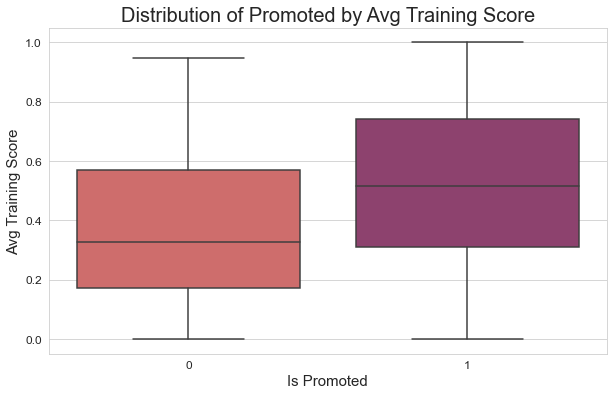

In [52]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create boxen plot
sns.set_style('whitegrid')
sns.boxplot(x='is_promoted', y='avg_training_score', palette = 'flare', data=df1)

# Decorate using Matplotlib
plt.title('Distribution of Promoted by Avg Training Score', fontsize = 20)
plt.ylabel('Avg Training Score', fontsize = 15)
plt.xlabel('Is Promoted', fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

<Figure size 1080x720 with 0 Axes>

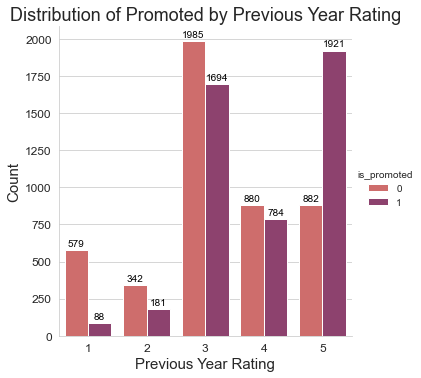

In [53]:
# Set figure size with matplotlib
plt.figure(figsize=(15,10))

# Create catplot
g = sns.catplot(data=df1,x='previous_year_rating',kind='count', hue='is_promoted', palette = 'flare')

# Decorate using Matplotlib
plt.title('Distribution of Promoted by Previous Year Rating', fontsize=18)
plt.xlabel('Previous Year Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, None)

ax = g.facet_axis(0,0)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

<Figure size 1080x720 with 0 Axes>

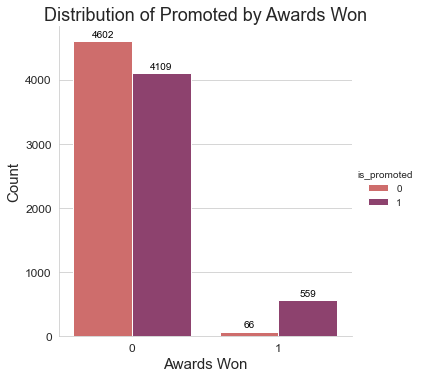

In [54]:
# Set figure size with matplotlib
plt.figure(figsize=(15,10))

# Create catplot
g = sns.catplot(data=df1,x='awards_won?',kind='count', hue='is_promoted', palette = 'flare')

# Decorate using Matplotlib
plt.title('Distribution of Promoted by Awards Won', fontsize=18)
plt.xlabel('Awards Won', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, None)

ax = g.facet_axis(0,0)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,6.958869,14.053985,2.678770,0.695587,2.526671,1.228685,3.522452,3.579799,1.502714,0.508569,0.066945,0.450084,0.500000
std,1.975376,9.901436,0.497625,0.460183,0.547611,0.567723,0.203017,1.176841,0.733728,0.499953,0.249940,0.251200,0.500027
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.995732,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,4.000000,2.000000,0.000000,2.000000,1.000000,3.367296,3.000000,1.098612,0.000000,0.000000,0.224138,0.000000
50%,7.000000,13.000000,3.000000,1.000000,3.000000,1.000000,3.496508,3.000000,1.609438,1.000000,0.000000,0.413793,0.500000
75%,9.000000,22.000000,3.000000,1.000000,3.000000,1.000000,3.637586,5.000000,1.945910,1.000000,0.000000,0.689655,1.000000
max,9.000000,34.000000,3.000000,1.000000,3.000000,7.000000,4.094345,5.000000,3.526361,1.000000,1.000000,1.000000,1.000000


### 1.4 Export the data <a id="part1.4"></a> 

In [55]:
# Export HR Analytics
df1.to_csv('hr_data_new.csv', index=False)

## 2. Airbnb <a id="part2"></a> 

### 2.1 Load and Explore the data <a id="part2.1"></a> 

In [56]:
# Load dataset into a DataFrame
df_list = pd.read_csv('listings.csv')

# Create a copy of the DataFrame
df2 = df_list.copy()

# Show overview of the dataset
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [57]:
# Show info of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [58]:
# Select numerical values
df2_num = df2.select_dtypes(['int64','float64']).copy()
df2_num.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,266763,1.44255,103.79580,83,180,1,0.01,2,365
1,50646,227796,1.33235,103.78521,81,90,18,0.28,1,365
2,56334,266763,1.44246,103.79667,69,6,20,0.20,2,365
3,71609,367042,1.34541,103.95712,206,1,14,0.15,9,353
4,71896,367042,1.34567,103.95963,94,1,22,0.22,9,355


In [59]:
# Analyse numerical values
df2_num.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


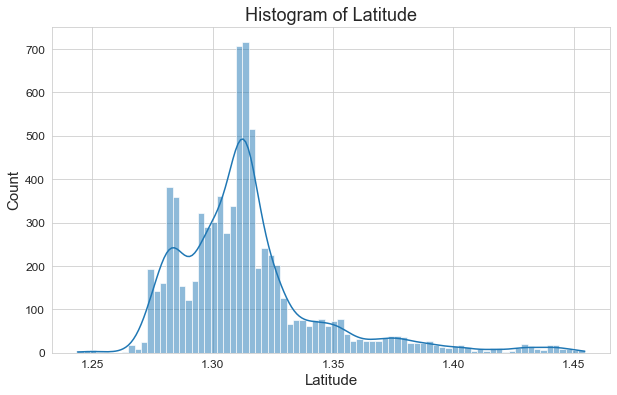

In [60]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create histogram
sns.histplot(x='latitude', kde = True,data=df2)

# Decorate using Matplotlib
plt.title('Histogram of Latitude', fontsize=18)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

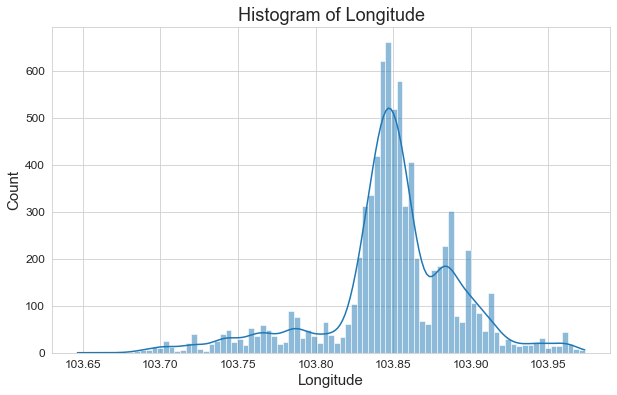

In [61]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create histogram
sns.histplot(x='longitude', kde = True,data=df2)

# Decorate using Matplotlib
plt.title('Histogram of Longitude', fontsize=18)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

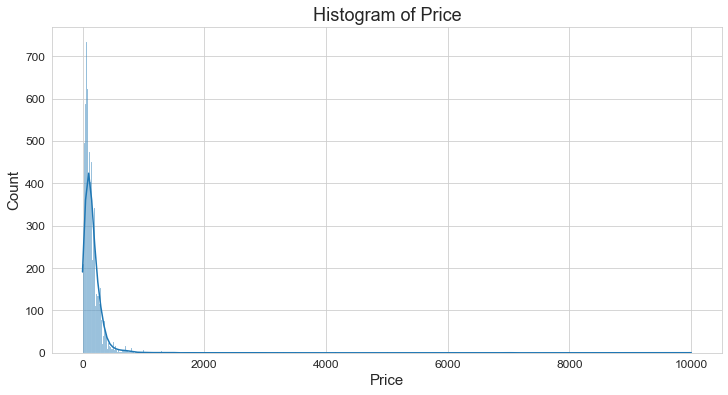

In [62]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Create histogram
sns.histplot(x='price', kde = True,data=df2)

# Decorate using Matplotlib
plt.title('Histogram of Price', fontsize=18)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

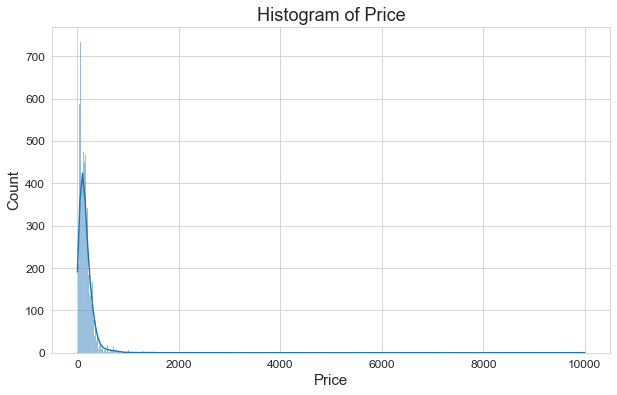

In [63]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create histogram
sns.histplot(x='price', kde = True,data=df2)

# Decorate using Matplotlib
plt.title('Histogram of Price', fontsize=18)
plt.xlabel('Price', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

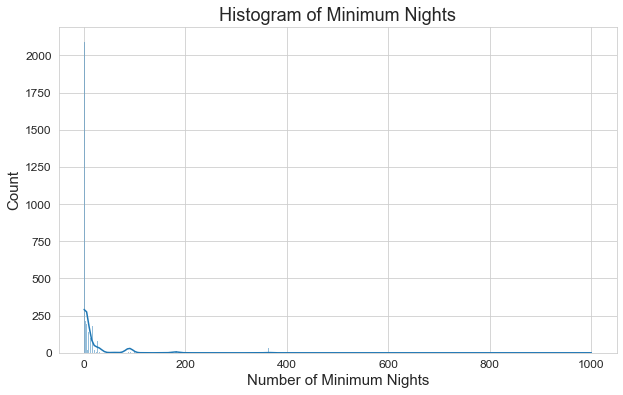

In [64]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create histogram
sns.histplot(x='minimum_nights', kde = True,data=df2)

# Decorate using Matplotlib
plt.title('Histogram of Minimum Nights', fontsize=18)
plt.xlabel('Number of Minimum Nights', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

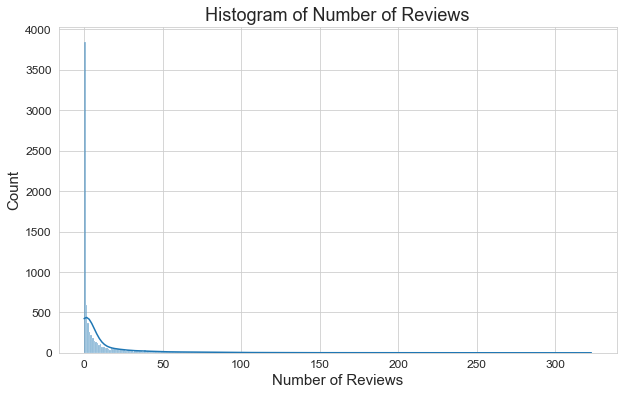

In [65]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create histogram
sns.histplot(x='number_of_reviews', kde = True,data=df2)

# Decorate using Matplotlib
plt.title('Histogram of Number of Reviews', fontsize=18)
plt.xlabel('Number of Reviews', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

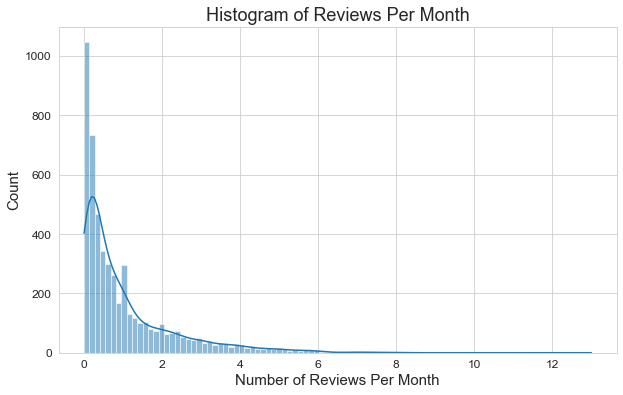

In [66]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create histogram
sns.histplot(x='reviews_per_month', kde = True,data=df2)

# Decorate using Matplotlib
plt.title('Histogram of Reviews Per Month', fontsize=18)
plt.xlabel('Number of Reviews Per Month', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

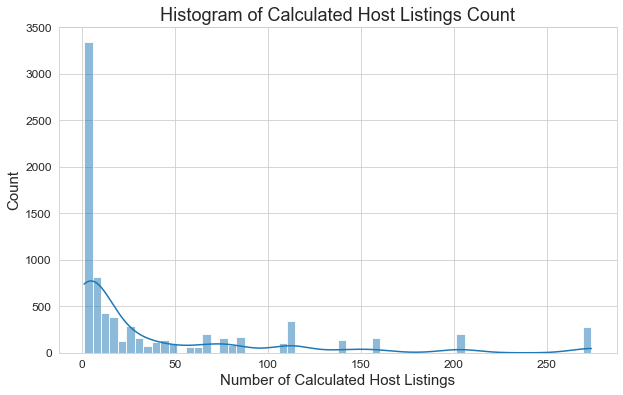

In [67]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create histogram
sns.histplot(x='calculated_host_listings_count', kde = True,data=df2)

# Decorate using Matplotlib
plt.title('Histogram of Calculated Host Listings Count', fontsize=18)
plt.xlabel('Number of Calculated Host Listings', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

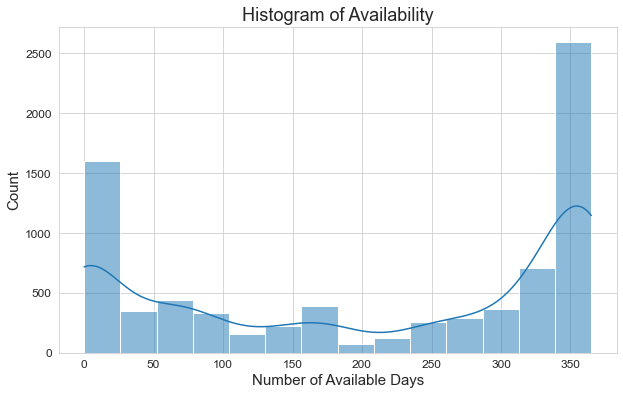

In [68]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create histogram
sns.histplot(x='availability_365', kde = True,data=df2)

# Decorate using Matplotlib
plt.title('Histogram of Availability', fontsize=18)
plt.xlabel('Number of Available Days', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display plot
plt.show()

In [69]:
# Select categorical values
df2_cat = df2.select_dtypes(['object']).copy()
df2_cat.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,COZICOMFORT LONG TERM STAY ROOM 2,Francesca,North Region,Woodlands,Private room,2013-10-21
1,Pleasant Room along Bukit Timah,Sujatha,Central Region,Bukit Timah,Private room,2014-12-26
2,COZICOMFORT,Francesca,North Region,Woodlands,Private room,2015-10-01
3,Ensuite Room (Room 1 & 2) near EXPO,Belinda,East Region,Tampines,Private room,2019-08-11
4,B&B Room 1 near Airport & EXPO,Belinda,East Region,Tampines,Private room,2019-07-28


In [70]:
# Analyse categorical values
df2_cat.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,7905,7907,7907,7907,7907,5149
unique,7457,1833,5,43,3,1001
top,Luxury hostel with in-cabin locker - Single mixed,Jay,Central Region,Kallang,Entire home/apt,2019-08-12
freq,13,290,6309,1043,4132,152


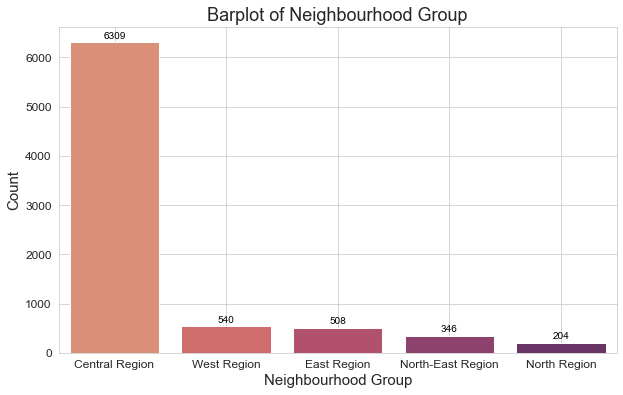

In [71]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create barplot
ax = sns.barplot(x=df2['neighbourhood_group'].value_counts().index, y=df2['neighbourhood_group'].value_counts(), 
                 palette='flare')

# Decorate using Matplotlib
plt.xlabel('Neighbourhood Group', fontsize=15)
plt.ylabel('Count', fontsize=15) 
plt.title('Barplot of Neighbourhood Group', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

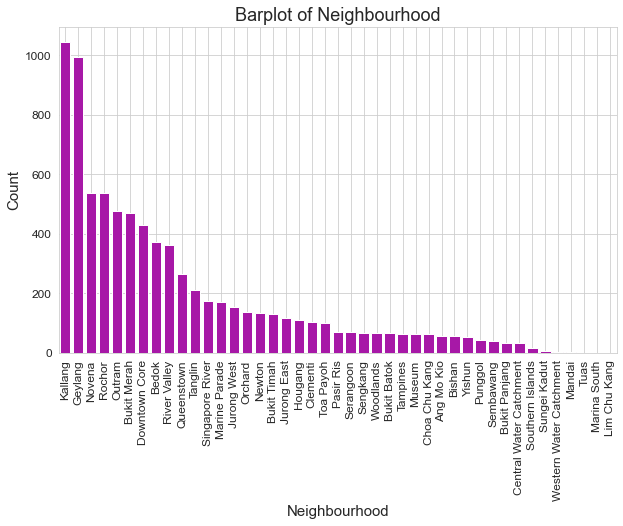

In [72]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create barplot
ax = sns.barplot(x=df2['neighbourhood'].value_counts().index, y=df2['neighbourhood'].value_counts(), color='m')

# Decorate using Matplotlib
plt.xlabel('Neighbourhood', fontsize=15)
plt.ylabel('Count', fontsize=15) 
plt.title('Barplot of Neighbourhood', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display plot
plt.show()

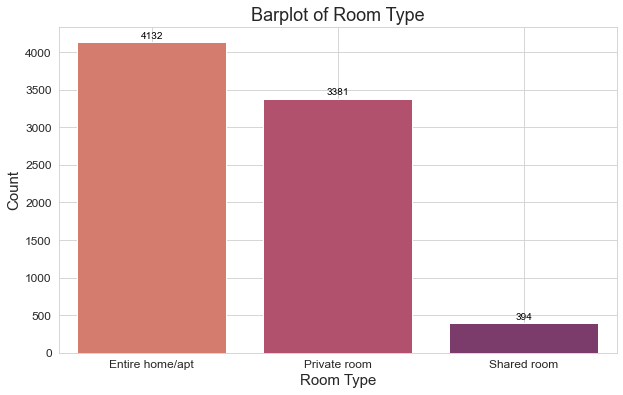

In [73]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create barplot
ax = sns.barplot(x=df2['room_type'].value_counts().index, y=df2['room_type'].value_counts(), palette='flare')

# Decorate using Matplotlib
plt.xlabel('Room Type', fontsize=15)
plt.ylabel('Count', fontsize=15) 
plt.title('Barplot of Room Type', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom')

# Display plot
plt.show()

### 2.2 Cleanse and Transform the data <a id="part2.2"></a> 

In [74]:
# Identify missing values in data frame
df2.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [75]:
# Clean missing values in name
df2 = df2.dropna(subset = ['name'])
df2.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2757
reviews_per_month                 2757
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [76]:
# Displays rows with missing last review values
df2[df2.loc[:,'last_review'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18,355955,Double room in an Authentic Peranakan Shophouse,1759905,Aresha,Central Region,Geylang,1.31420,103.90232,Private room,81,90,0,NaN,NaN,1,173
23,481789,Master Bedroom in Newly Built Flat,2386154,Susan,East Region,Tampines,1.34816,103.93238,Private room,37,180,0,NaN,NaN,1,365
26,642660,BEST CITY LIVING WITH GA RESIDENCE,3212572,Roger,Central Region,Rochor,1.30109,103.85234,Private room,167,180,0,NaN,NaN,1,365
28,719944,HDB housing in prime area near town,3648224,Audrey,Central Region,Queenstown,1.30901,103.79639,Shared room,208,1,0,NaN,NaN,1,0
29,733863,Homestay at Serangoon,3824517,Shirlnet,North-East Region,Serangoon,1.36743,103.87288,Private room,26,180,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,38105126,Loft 2 pax near Haw Par / Pasir Panjang. Free ...,278109833,Belle,Central Region,Queenstown,1.27973,103.78751,Entire home/apt,100,3,0,NaN,NaN,31,61
7903,38108273,3bedroom luxury at Orchard,238891646,Neha,Central Region,Tanglin,1.29269,103.82623,Entire home/apt,550,6,0,NaN,NaN,34,365
7904,38109336,[ Farrer Park ] New City Fringe CBD Mins to MRT,281448565,Mindy,Central Region,Kallang,1.31286,103.85996,Private room,58,30,0,NaN,NaN,3,173
7905,38110493,Cheap Master Room in Central of Singapore,243835202,Huang,Central Region,River Valley,1.29543,103.83801,Private room,56,14,0,NaN,NaN,2,30


In [77]:
# Identify paramters for last review
temp = pd.to_datetime(df2['last_review'])

start_date = min(temp)
end_date = max(temp)

print(start_date)
print(end_date)

2013-10-21 00:00:00
2019-08-27 00:00:00


In [78]:
# Clean missing values in last review
df2['last_review'] = (end_date - temp).dt.days
df2['last_review'] = df2['last_review'].fillna((end_date - start_date).days + 1)
df2['last_review'] = df2['last_review'].astype(int)
df2.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 2757
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [79]:
# Clean missing values in reviews per month
df2.loc[df2['reviews_per_month'].isna(), 'reviews_per_month'] = 0
df2.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [80]:
# Identify neighbourhood group values
df2['neighbourhood_group'].value_counts()

Central Region       6307
West Region           540
East Region           508
North-East Region     346
North Region          204
Name: neighbourhood_group, dtype: int64

In [81]:
# Focus on a specific region
df2 = df2[df2['neighbourhood_group'] == 'Central Region']

In [82]:
# Drop irrelevant columns
df2 = df2.drop(['id','name','host_name','host_id','neighbourhood_group'], axis = 1)
df2.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,Bukit Timah,1.33235,103.78521,Private room,81,90,18,1705,0.28,1,365
10,Bukit Merah,1.28875,103.80814,Private room,44,15,18,128,0.23,32,331
11,Bukit Merah,1.28837,103.81099,Private room,40,30,10,348,0.11,32,276
13,Newton,1.31125,103.83816,Private room,65,2,125,5,1.35,6,336
14,Bukit Merah,1.28976,103.80896,Private room,44,30,13,206,0.15,32,340


In [83]:
# Analyse price
df2['price'].describe()

count     6307.000000
mean       176.571429
std        293.975476
min          0.000000
25%         81.000000
50%        135.000000
75%        208.000000
max      10000.000000
Name: price, dtype: float64

In [84]:
# Identify outliers in price
price_Q1 = df2['price'].describe()['25%']
price_Q3 = df2['price'].describe()['75%']
price_IQR = price_Q3 - price_Q1
price_min = price_Q1 - (1.5 * price_IQR)
price_max = price_Q3 + (1.5 * price_IQR)
print('Prices below {0:.2f} and above {1:.2f} are considered outliers'.format(price_min,price_max))

Prices below -109.50 and above 398.50 are considered outliers


In [85]:
# Clean outliers in price
df2.drop(df2[df2['price'] > price_max].index, inplace = True)
df2['price'].describe()

count    5994.000000
mean      143.466300
std        85.032419
min         0.000000
25%        75.000000
50%       131.000000
75%       199.000000
max       394.000000
Name: price, dtype: float64

In [86]:
# Analyse minimum nights
df2['minimum_nights'].describe()

count    5994.000000
mean       15.755422
std        36.356774
min         1.000000
25%         2.000000
50%         3.000000
75%        10.000000
max      1000.000000
Name: minimum_nights, dtype: float64

In [87]:
# Identify outliers in minimum nights
nights_Q1 = df2['minimum_nights'].describe()['25%']
nights_Q3 = df2['minimum_nights'].describe()['75%']
nights_IQR = nights_Q3 - nights_Q1
nights_min = nights_Q1 - (1.5 * nights_IQR)
nights_max = nights_Q3 + (1.5 * nights_IQR)
print('Minimum Nights below {0:.0f} and above {1:.0f} are considered outliers'.format(nights_min,nights_max))

Minimum Nights below -10 and above 22 are considered outliers


In [88]:
# Clean outliers in minimum nights
df2['minimum_nights'] = np.where(df2['minimum_nights'] > nights_max, df2['minimum_nights'].median(), df2['minimum_nights'])
df2['minimum_nights'].describe()

count    5994.000000
mean        3.965465
std         4.232045
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        22.000000
Name: minimum_nights, dtype: float64

In [89]:
# Identify neighbourhood values
df2['neighbourhood'].value_counts()

Kallang             998
Geylang             965
Novena              530
Rochor              499
Outram              464
Bukit Merah         451
Downtown Core       400
River Valley        342
Queenstown          263
Tanglin             197
Marine Parade       169
Singapore River     149
Bukit Timah         128
Newton              123
Orchard             109
Toa Payoh           100
Bishan               52
Museum               51
Southern Islands      4
Name: neighbourhood, dtype: int64

In [90]:
# Map neighbourhood values 
df2['neighbourhood'] = pd.factorize(df2['neighbourhood'], sort = True)[0]+1
df2['neighbourhood'].value_counts()

6     998
5     965
10    530
15    499
12    464
2     451
4     400
14    342
13    263
18    197
7     169
16    149
3     128
9     123
11    109
19    100
1      52
8      51
17      4
Name: neighbourhood, dtype: int64

In [91]:
# Identify room type values
df2['room_type'].value_counts()

Entire home/apt    3478
Private room       2172
Shared room         344
Name: room_type, dtype: int64

In [92]:
# Map room type values
df2['room_type'] = df2['room_type'].map( {
    'Shared room': 1,
    'Private room': 2,
    'Entire home/apt': 3} ).astype(int)

In [93]:
# Analyse info in data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5994 entries, 1 to 7906
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   5994 non-null   int64  
 1   latitude                        5994 non-null   float64
 2   longitude                       5994 non-null   float64
 3   room_type                       5994 non-null   int32  
 4   price                           5994 non-null   int64  
 5   minimum_nights                  5994 non-null   float64
 6   number_of_reviews               5994 non-null   int64  
 7   last_review                     5994 non-null   int32  
 8   reviews_per_month               5994 non-null   float64
 9   calculated_host_listings_count  5994 non-null   int64  
 10  availability_365                5994 non-null   int64  
dtypes: float64(4), int32(2), int64(5)
memory usage: 515.1 KB


In [94]:
# Analyse skewness in data
df2.skew()

neighbourhood                     0.398745
latitude                         -0.001701
longitude                        -0.402027
room_type                        -0.871046
price                             0.748482
minimum_nights                    2.448076
number_of_reviews                 4.082979
last_review                       0.511186
reviews_per_month                 2.632860
calculated_host_listings_count    1.854964
availability_365                 -0.365596
dtype: float64

### 2.3 Correlation Analysis <a id="part2.3"></a> 

In [95]:
# Analyse correlation between variables
df2.corr()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,1.000000,-0.044000,-0.272067,-0.104647,-0.007364,-0.049317,0.039439,-0.037319,0.023318,-0.094585,0.010980
latitude,-0.044000,1.000000,0.319598,0.066656,0.004745,0.095317,0.009693,0.017069,-0.011341,0.045730,-0.020697
longitude,-0.272067,0.319598,1.000000,0.093883,0.003551,0.051597,0.078995,-0.038037,0.083085,0.125357,-0.042666
room_type,-0.104647,0.066656,0.093883,1.000000,0.604534,0.129289,-0.026614,0.025605,0.009023,0.308761,-0.068469
price,-0.007364,0.004745,0.003551,0.604534,1.000000,-0.004223,-0.057690,0.047937,0.011011,0.179177,0.071146
minimum_nights,-0.049317,0.095317,0.051597,0.129289,-0.004223,1.000000,-0.149109,0.116768,-0.194543,0.281027,0.168875
number_of_reviews,0.039439,0.009693,0.078995,-0.026614,-0.057690,-0.149109,1.000000,-0.371424,0.669640,-0.177657,-0.083996
last_review,-0.037319,0.017069,-0.038037,0.025605,0.047937,0.116768,-0.371424,1.000000,-0.523369,0.114952,0.049339
reviews_per_month,0.023318,-0.011341,0.083085,0.009023,0.011011,-0.194543,0.669640,-0.523369,1.000000,-0.218209,-0.128524
calculated_host_listings_count,-0.094585,0.045730,0.125357,0.308761,0.179177,0.281027,-0.177657,0.114952,-0.218209,1.000000,0.248985


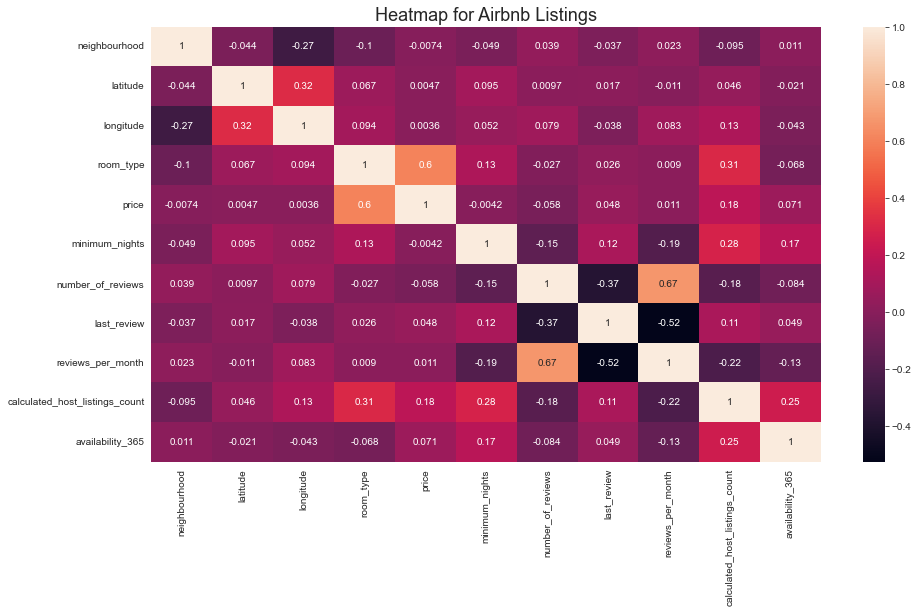

In [96]:
# Create heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(),annot=True)

plt.title('Heatmap for Airbnb Listings', fontsize=18)
plt.show()

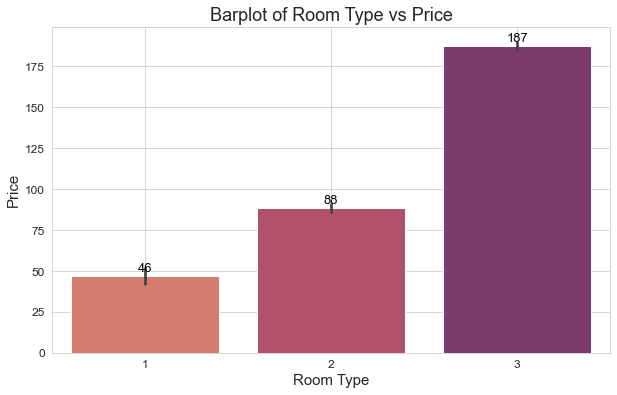

In [97]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create barplot
ax = sns.barplot(x=df2['room_type'], y=df2['price'], palette='flare')

# Decorate using Matplotlib
plt.xlabel('Room Type', fontsize=15)
plt.ylabel('Price', fontsize=15) 
plt.title('Barplot of Room Type vs Price', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), 
            xy=(p.get_x() + p.get_width() / 2, p.get_height()),
            xytext=(0, 2),
            color='black',
            textcoords='offset points',
            ha='center', va='bottom', fontsize=13)

# Display plot
plt.show()

<Figure size 720x432 with 0 Axes>

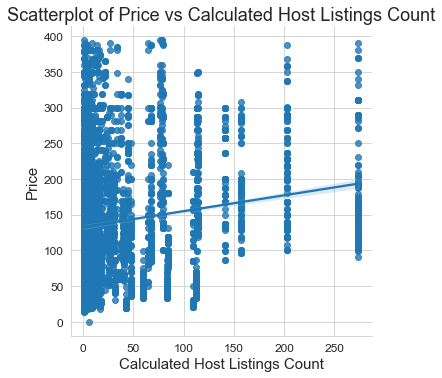

In [98]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
# Create scatterplot
sns.lmplot(x='calculated_host_listings_count', y='price',data=df2)


# Decorate using Matplotlib
plt.xlabel('Calculated Host Listings Count', fontsize=15)
plt.ylabel('Price', fontsize=15) 
plt.title('Scatterplot of Price vs Calculated Host Listings Count', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Display plot
plt.show()

### 2.4 Export the data <a id="part2.4"></a> 

In [99]:
# Export Airbnb
df2.to_csv('listings_new.csv', index=False)